# Predicting Car Prices

Buying a new car can be tricky. Often times, we are unsure if the price that we are paying for the car is reasonable. Add to this the sheer number of cars on the market, consisting of many different sizes and features, and it can be downright impossible to know if the price your dealer is offering is reasonable.

To help reduce the uncertainty of this decision, we can look toward data science. If we have a list of cars and their attributes, along with price, we can use that list to train a machine learning algorithm to predict the price of a car.

## Goal: 

My goal in this project is *to build a model that can predict the price of a car, given its list of attributes.*

### Method:

To achieve this goal, I will train a **multivariate *k*-Nearest Neighbors model** on [this dataset of cars](https://archive.ics.uci.edu/ml/datasets/automobile) here. The dataset is sourced from the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) of the Center for Machine Learning and Intelligent Systems at the University of California-Irvine.

## Table of Contents:

* [Introducing the Data](#introducing)
* [Filtering the Columns of the Dataframe](#columns)
* [Cleaning the Data](#cleaning)
    * [Replacing `?` values with `NaN`](#replacing)
    * [Changing object-type columns to numeric-type](#numeric)
    * [Dealing with `NaN` values](#nan)
    * [Separating target and feature columns](#separating)
* [Normalizing the Data](#normalizing)
* [Univariate k-Nearest Neighbors Model](#univariate)
    * [Hyperparameter Tuning: Univariate Model with varying *k*](#univariate-k)
    * [Visualizing the RMSE Values from the Univariate Model](#visualizing)
    * [Isolating the Top 5 Features from the Univariate Model](#top_5)
* [Multivariate *k*-Nearest Neighbors Model](#multivariate)
    * [Isolating the Top 3 Sets of Features from the Multivariate Model](#top_3)
    * [Hyperparameter tuning: Multivariate Model with varying *k*](#multivariate_k)
    * [Visualizing the RMSE Values from the Multivariate Model](#visualizing-multi)
* [Conclusion](#conclusion)
    * [Further Research](#further)

## Introducing the Data <a class="anchor" id="introducing"></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# The source data does not contain a header row

columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
           'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
           'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower',
           'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


cars = pd.read_csv('imports-85.data', names=columns)

In [3]:
cars.shape

(205, 26)

In [4]:
pd.set_option('display.max_columns', 30)

cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
cars.tail()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

Before cleaning the dataframe, I will first filter it according to which columns that I will use for the algorithm. Since the *k*-Nearest Neighbors algorithm should only accept continuous or binary data, I will go ahead and filter the dataframe to only include columns of these datatypes.

The documentation for the dataset informs us as to which columns are continuous or not. I will choose not to create any binary column data in this project. 

## Filtering the Columns of the Dataframe <a class="anchor" id="columns"></a>

In [7]:
# Filtering for only continuous variables

continuous_columns = ['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 
                      'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 
                      'highway_mpg', 'price']

cars_cont = cars[continuous_columns]

## Cleaning the Data <a class="anchor" id="cleaning"></a>

Now that I have filtered the columns of the dataframe, I will go ahead and clean the dataframe.

The summary of the dataframe indicates that some cells contain a `?` where a null value should be. I will clean up those cells by replacing the `?` with `NaN`. 

Also, a few of the columns that should be numeric types are object types. I will have to change those.

### Replacing `?` values with `NaN` <a class="anchor" id="replacing"></a>

In [8]:
cars_cont = cars_cont.replace('?', np.nan)

### Changing object-type columns to numeric-type <a class="anchor" id="numeric"></a>

In [9]:
cols_to_numeric = ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']

for col in cols_to_numeric:
    
    cars_cont[cols_to_numeric] = cars_cont[cols_to_numeric].astype(float)

### Dealing with `NaN` values <a class="anchor" id="nan"></a>

The *k*-Nearest Neighbors algorithm cannot accept null values. Therefore, we will have to determine which cells contain null values and what to do with them.

In [10]:
# Viewing the number of null values in each column

cars_cont.isnull().sum()

symboling             0
normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

The `price` column contains $4$ null values. Since the `price` column is our target column, we will have to eliminate those rows from the dataframe.

In [11]:
# Dropping the null price rows

cars_cont = cars_cont.dropna(subset=['price'])

In [12]:
# Reviewing the number of null values

cars_cont.isnull().sum()

symboling             0
normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

The next column with null values that we need to work with is the `normalized_losses` column. There are $37$ null values in this column, which is a lot since we have about $200$ rows in our entire dataframe. We will have to decide how we want to deal with this column (whether to fill the cells with estimated values, fill them with known values, or remove the rows or column entirely).

In [13]:
# Viewing the mean

cars_cont['normalized_losses'].mean()

122.0

In [14]:
# Viewing the median

cars_cont['normalized_losses'].median()

115.0

In [15]:
# Viewing the mode

cars_cont['normalized_losses'].mode()[0]

161.0

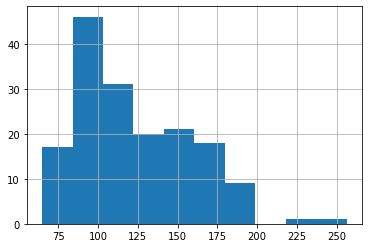

In [16]:
# Viewing the histogram

cars_cont['normalized_losses'].hist()

plt.show()

The `normalized_losses` column data is skewed to the right.

The bin with the most values is roughly the $range(85, 105)$ bin. About $47$ data points fall within this range.

The mean value of the column data is $122$. 

The median value of the column data is $115$.

The mode of the column data is $161$.

We cannot fill the cells with known values since we do not have known values for the data. We cannot remove all rows with empty cells here because that would eliminate nearly $20\%$ of the rows in the dataframe. Therefore, we must decide to either eliminate the column or fill the rows with an estimated value. 

Filling the null-value cells with any one of the $3$ calculated aggregate values, or with a value in the most common histogram bin, would significantly alter the distribution and statistics of the data. 

Therefore, the best course of action is to just drop the column entirely. 

I will go ahead and do that now:

In [17]:
# Dropping the `normalized_losses` column

cars_cont = cars_cont.drop(columns='normalized_losses')

In [18]:
# Reviewing the number of null values

cars_cont.isnull().sum()

symboling            0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Since `bore`, `stroke`, `peak_rpm`, and `horsepower` are all continuous variables, and the number of `NaN` datapoints in each column is less than $2\%$ of the number of rows, it is reasonable to simply fill these `NaN` values with the average of their columns:

In [19]:
# Filling the `NaN` values with the average values

cars_cont = cars_cont.fillna(cars_cont.mean())

In [20]:
# Reviewing the number of null values

cars_cont.isnull().sum()

symboling            0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

## Normalizing the Data <a class="anchor" id="normalizing"></a>

Now that the dataframe is cleaned, it is time to normalize the features to prepare for the *k*-Nearest Neighbors algorithm. I will make sure to normalize the feature columns while keeping the `price` column the same.

In [21]:
# Normalizing the feature columns

features = cars_cont.drop('price', axis=1)
target = cars_cont['price']

features_norm = (features - features.min()) / (features.max() - features.min())

cars_norm  = pd.concat([features_norm, target], axis=1)

cars_norm.reset_index(drop=True, inplace=True) # Reseting the index

cars_norm.head()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate *k*-Nearest Neighbors Model <a class="anchor" id="univariate"></a>

Starting with the univariate *k*-Nearest Neighbors model, I will get a sense of which individual features of the dataframe may best predict car price. 

For the first model, I will use the default settings for the *k*-Nearest Neighbors algorithm in the `sklearn` library.

In [22]:
def knn_train_test(feature_column, target_column, dataframe):
    
    np.random.seed(1) # random seed, training & test sets are same for all models
    
    knn = KNeighborsRegressor()
    
    shuffled_index = np.random.permutation(len(dataframe))
    random_df = dataframe.reindex(shuffled_index) # Dataframe is shuffled
    
    total_rows = len(random_df)    
    train_rows = int(0.5*total_rows) # small dataset: 50/50 Training_set/Test_set split
    
    train_df = random_df[:train_rows]
    test_df = random_df[train_rows:]
    
    knn.fit(train_df[[feature_column]], train_df[target_column])
    predicted_labels = knn.predict(test_df[[feature_column]])
    
    mse = mean_squared_error(test_df[target_column], predicted_labels)
    rmse = np.sqrt(mse)
        
    return rmse # returns RMSE

In [23]:
# Calculating RMSE using each feature

rmse_results = {}

feature_columns = features.columns

for column in feature_columns:
    
    col_rmse = knn_train_test(column, 'price', cars_norm)
    
    rmse_results[column] = col_rmse
    
rmse_results # Viewing each feature:RMSE

{'symboling': 7979.434919842381,
 'wheel_base': 5461.553997873057,
 'length': 5427.2009608367125,
 'width': 4704.482589704386,
 'height': 8144.441042663747,
 'curb_weight': 4401.118254793124,
 'engine_size': 3238.4628296477176,
 'bore': 6780.627784685976,
 'stroke': 8006.529544647101,
 'compression_ratio': 6610.812153159129,
 'horsepower': 4037.0377131537603,
 'peak_rpm': 7697.4596964334805,
 'city_mpg': 4766.422505090134,
 'highway_mpg': 4630.026798588056}

### Hyperparameter Tuning: Univariate Model with varying *k* <a class="anchor" id="univariate-k"></a>

While each feature possesses a different predictive capability, different values of the hyperparameter *k* also possess different predictive capabilities.

I will now vary *k* for each feature a few times and save each RMSE value with its corresponding *k*-value and feature so that I can determine which features are the best univariate features over a range of *k*-values for predicting car prices.

In [24]:
def knn_train_test_k(feature_column, target_column, dataframe):  
    
    np.random.seed(1) # random seed, training & test sets are same for all models
    
    shuffled_index = np.random.permutation(len(dataframe))  
    random_df = dataframe.loc[shuffled_index] # Dataframe is shuffled
        
    total_rows = len(random_df)
    train_rows = int(0.5*total_rows) # small dataset: 50/50 Training_set/Test_set split
    
    train_df = random_df[:train_rows]
    test_df = random_df[train_rows:]
    
    k_vals = [1,3,5,7,9] # [1,3,5,7,9] = k-values
    
    k_rmse_results = {}
    
    for k in k_vals: # Iterating over each k-value

        knn = KNeighborsRegressor(n_neighbors=k) # n_neighbors = k
        
        knn.fit(train_df[[feature_column]], train_df[target_column])
        predicted_labels = knn.predict(test_df[[feature_column]])
    
        mse = mean_squared_error(test_df[target_column], predicted_labels)
        rmse = np.sqrt(mse)
                
        k_rmse_results[k] = rmse # RMSE for each k
    
    return k_rmse_results # returns k:RMSE dictionary

In [25]:
# Calculating RMSE for each k-value using each feature

k_rmse_results = {} # Dictionary of k:RMSE dictionaries

for column in feature_columns:
    
    col_k_rmse_results = knn_train_test_k(column, 'price', cars_norm)
        
    k_rmse_results[column] = col_k_rmse_results
        
k_rmse_results[column] # Viewing one k:RMSE dictionary

{1: 6025.594966720739,
 3: 4617.305019788554,
 5: 4630.026798588056,
 7: 4796.061440186946,
 9: 5278.358056953987}

### Visualizing the RMSE Values from the Univariate Model <a class="anchor" id="visualizing"></a>

This dictionary of *k*-RMSE dictionaries is a lot of information. I will now visualize all of these *k*-RMSE pairs in a line chart.

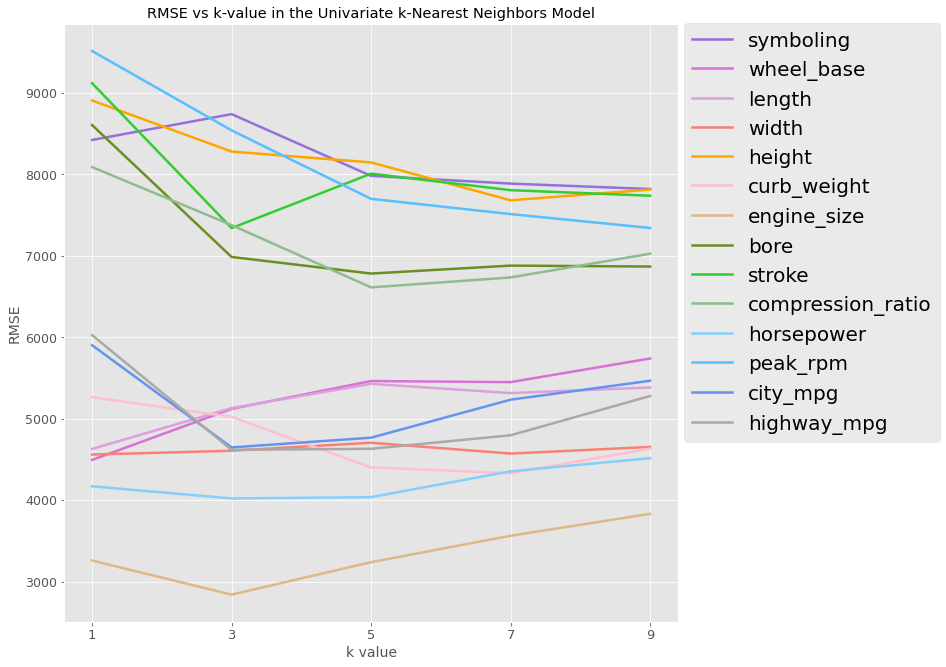

In [26]:
fig = plt.figure(figsize=(11,11))

plt.style.use('ggplot')

# colors:
# medium purple, orchid, plum, 
# salmon, orange, pink, 
# burlywood, olive drab, lime green,
# dark sea green, light sky blue, (deep sky blue shade),
# cornflower blue, dark gray

colors = ['#9370db', '#da70d6', '#dda0dd',
         '#fa8072', '#ffa500', '#ffc0cb',
         '#deb887', '#6b8e23', '#32cd32',
         '#8fbc8f', '#87cefa', '#58bfff',
         '#6495ed', '#a9a9a9']

i = 0

for column in feature_columns:
    
    plt.plot(list(k_rmse_results[column].keys()), 
             list(k_rmse_results[column].values()), 
             linewidth=2.5, 
             c=colors[i])
    
    i += 1
    
plt.title('RMSE vs k-value in the Univariate k-Nearest Neighbors Model', fontsize=14.5)
    
plt.xlabel('k value', fontsize=14)

plt.ylabel('RMSE', fontsize=14)

plt.xticks([1,3,5,7,9], fontsize=13)

plt.yticks(fontsize=12.5)

plt.legend(feature_columns, loc=(1.01,0.3), fontsize=20)

plt.show()

Some features clearly perform better than others. For instance, `engine_size` consistently performed better than every other feature in the univariate model. `horsepower` performed very well too. Still others performed decently, while another group of features performed relatively poorly.

An elbow shape is visible in the graph of most features' RMSE values, denoting the minimum RMSE value and therefore the optimum *k*-value for that feature in the univariate *k*-Neareset Neighbors model.

From here I can determine which features are performing well so far, and forward them to the multivariate *k*-Nearest Neighbors model.

### Isolating the Top 5 Features from the Univariate Model <a class="anchor" id="top_5"></a>

I will arbitrarily choose to keep the top $5$ univariate features.

To find the top $5$ features, I will create a sorted `feature: avg_RMSE` dictionary.

In [27]:
# Finding top 5 features

nr_of_features = 5 # arbitrary

avg_rmse_by_feature = {} # feature:avg_RMSE dictionary

for feature in feature_columns: # Iterating over each feature
    
    k_rmse_values = []
        
    for k in list(k_rmse_results[feature].keys()):
            
        rmse = k_rmse_results[feature][k]
        k_rmse_values.append(rmse)
                
    avg_rmse = np.mean(k_rmse_values) # avg RMSE
    avg_rmse_by_feature[feature] = avg_rmse

avg_rmse_by_feature_sorted = {feature: rmse for feature, rmse 
                              in sorted(avg_rmse_by_feature.items(), 
                                        key=lambda item: item[1])} # sorted feature:avg_RMSE dictionary

avg_rmse_by_feature_sorted # Viewing each feature:avg_RMSE

{'engine_size': 3346.4845861055824,
 'horsepower': 4219.377860395267,
 'width': 4618.910559617357,
 'curb_weight': 4730.075815236338,
 'highway_mpg': 5069.469256447656,
 'length': 5176.394903761173,
 'city_mpg': 5202.40900297338,
 'wheel_base': 5252.3924618645415,
 'compression_ratio': 7166.0735987331045,
 'bore': 7222.4724453254985,
 'stroke': 8000.240466568112,
 'peak_rpm': 8119.365233100782,
 'height': 8163.346265875198,
 'symboling': 8167.734209338618}

At this point, the easist way to find the top $5$ features is to pick the first $5$ entries in the sorted dictionary. But I want to make this code reproducible in any random state, so I will write a code that finds the top $5$ features regardless, and returns those as a list.

In [28]:
# Finding the top 5 features

avg_rmse_list = [] # List of lists [[feature, avg_rmse], ...]

for feature in avg_rmse_by_feature_sorted.keys(): # Iterating through sorted dictionary
    
    avg_rmse = avg_rmse_by_feature_sorted[feature] 
    avg_rmse_list.append([feature, avg_rmse]) # List of lists
    
avg_rmse_series = pd.Series([avg_rmse_list[i][1] for i in range(len(feature_columns))],            
                            index=[avg_rmse_list[i][0] for i in range(len(feature_columns))],      
                            name='avg_rmse') # Converting list of lists to series,
                                             # Indexing series by feature names

top_5_features = list(avg_rmse_series.head(nr_of_features).index) # Converting series index to list 

top_5_features # Viewing top 5 features

['engine_size', 'horsepower', 'width', 'curb_weight', 'highway_mpg']

## Multivariate *k*-Nearest Neighbors Model <a class="anchor" id="multivariate"></a>

Now that I have the these top $5$ features, I will train a few multivariate *k*-Nearest Neighbors models with them:

In [29]:
def knn_train_test_multi(feature_columns, target_column, dataframe):
    
    np.random.seed(1) # random seed, training & test sets are same for all models
    
    knn = KNeighborsRegressor()
        
    shuffled_index = np.random.permutation(len(dataframe))
    random_df = dataframe.reindex(shuffled_index) # Dataframe is shuffled
        
    total_rows = len(random_df)
    train_rows = int(0.5*total_rows) # small dataset: 50/50 Training_set/Test_set split
    
    train_df = random_df[:train_rows]
    test_df = random_df[train_rows:]
        
    knn.fit(train_df[feature_columns], train_df[target_column]) # feature columns    
    predicted_labels = knn.predict(test_df[feature_columns])
        
    mse = mean_squared_error(test_df[target_column], predicted_labels)    
    rmse = np.sqrt(mse)
        
    return rmse # returns RMSE

I will calculate the RMSE using the top $2$ features, the top $3$ features, the top $4$ features, and so on. I will save these RMSEs in a dictionary:

In [30]:
# Calculating RMSE with top feature sets

multi_rmse = {} # feature_set:RMSE dictionary

for i in range(2, nr_of_features+1):
        
    features = top_5_features[:i] # top 2 features, top 3 features, ...
        
    rmse = knn_train_test_multi(features, 'price', cars_norm)
        
    features_length = len(features)
    multi_rmse[features_length] = rmse
    
multi_rmse # Viewing each feature_set:RMSE

{2: 2949.8817277180374,
 3: 3580.7376651928435,
 4: 3487.340917327035,
 5: 3410.2170133901805}

### Isolating the Top 3 Sets of Features from the Multivariate Model <a class="anchor" id="top_3"></a>

I would now like to train a multivariate model using varying *k*-values. It is likely that at least $1$ of the top $3$ feature sets in the dictionary above will perform better than the worst performing feature set. Therefore, to make the model's computation easier, I will filter the feature sets down to just the top $3$ before running the varying *k* model.

Again, I could simply just look at the dictionary above and pick the top $3$ sets, but I want to make this project reproducible in any random state. Therefore, I will write a code that will find the top $3$ feature sets:

In [31]:
# Finding top 3 feature sets

nr_of_feature_sets = 3 # arbitrary

feature_sets_list = [] # List of lists [[feature,...]]

for i in range(2,nr_of_features+1):
        
    features = top_5_features[:i] # top 2, top 3, ...    
    feature_sets_list.append(features)
    
feature_sets_rmse_list = [] # List of lists [[feature_set_length, rmse], ...]

for feature_set_length in multi_rmse.keys(): # Iterating through dictionary
        
    rmse = multi_rmse[feature_set_length]
    feature_sets_rmse_list.append([feature_set_length, rmse]) # List of lists [[feature_set_length, rmse], ...]
    
multi_rmse_series = pd.Series([feature_sets_rmse_list[i][1] for i in range(4)],                       
                              index=[feature_sets_rmse_list[i][0] for i in range(4)],             
                              name='rmse') # Converting list of lists to series,
                                           # Indexing series by feature_set_length

multi_rmse_sorted = multi_rmse_series.sort_values().reset_index() # Sorted series, reset index
                                                                  # Series is now dataframe, with
                                                                  # `index` column = feature_set_length
        
top_3_feature_sets = [] # List of lists [[features,...]]

for i in range(nr_of_feature_sets):
        
    feature_set_length = multi_rmse_sorted['index'][i] # top, second, third
        
    for feature_set in feature_sets_list:
                
        if len(feature_set) == feature_set_length:
    
            top_3_feature_sets.append(feature_set)
        
top_3_feature_sets # Viewing top 3 feature sets

[['engine_size', 'horsepower'],
 ['engine_size', 'horsepower', 'width', 'curb_weight', 'highway_mpg'],
 ['engine_size', 'horsepower', 'width', 'curb_weight']]

### Hyperparameter Tuning: Multivariate Model with varying *k* <a class="anchor" id="multivariate_k"></a>

Now that I have the top $3$ feature sets selected, I can train a multivariate *k*-Nearest Neighbors model on each of them using several different *k* values.

In [32]:
def knn_train_test_multi_k(feature_columns, target_column, dataframe): 
    
    np.random.seed(1) # random seed, training & test sets are same for all models

    shuffled_index = np.random.permutation(len(dataframe))  
    random_df = dataframe.loc[shuffled_index] # Dataframe is shuffled
    
    total_rows = len(random_df)  
    train_rows = int(0.5*total_rows) # small dataset: 50/50 Training_set/Test_set split
    
    train_df = random_df[:train_rows]  
    test_df = random_df[train_rows:] 
    
    k_values = np.arange(1,26) # Using 25 different k values
    
    k_rmse_results = {}
    
    for k in k_values:
    
        knn = KNeighborsRegressor(n_neighbors=k) # n-neighbors = k
        
        knn.fit(train_df[feature_columns], train_df[target_column]) # feature columns
        predicted_labels = knn.predict(test_df[feature_columns])
    
        mse = mean_squared_error(test_df[target_column], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmse_results[k] = rmse    
    
    return k_rmse_results # returns k:RMSE dictionary

In [33]:
# Calculating RMSE for each k-value (25) for each of the top 3 multivariate feature sets

top_3_k_rmse_results = {} # Dictionary of dictionaries

for feature_set in top_3_feature_sets:
    
    length = len(feature_set)

    k_rmse_results = knn_train_test_multi_k(feature_set, 'price', cars_norm)
    
    top_3_k_rmse_results[length] = k_rmse_results
    
top_3_k_rmse_results[length] # Viewing one k:RMSE dictionary

{1: 2952.725686581471,
 2: 3131.704952720018,
 3: 3129.692821910155,
 4: 3241.4320776448717,
 5: 3487.340917327035,
 6: 3637.0381471429987,
 7: 3606.195077860286,
 8: 3809.9307026308247,
 9: 3875.274902378068,
 10: 3997.1583055842293,
 11: 4162.564050411074,
 12: 4289.486490995821,
 13: 4368.061602779942,
 14: 4416.304772968801,
 15: 4434.013914355171,
 16: 4441.4634909198785,
 17: 4512.996303789127,
 18: 4523.575629742228,
 19: 4534.834065236792,
 20: 4620.211598150367,
 21: 4688.356509517293,
 22: 4731.46717779913,
 23: 4763.535312989311,
 24: 4751.601375872476,
 25: 4757.099289594177}

### Visualizing the RMSE Values from the Multivariate Model <a class="anchor" id="visualizing-multi"></a>

This is a lot of data. The best way to view this and find out which model predicts car prices the best is to visualize it in a line graph:

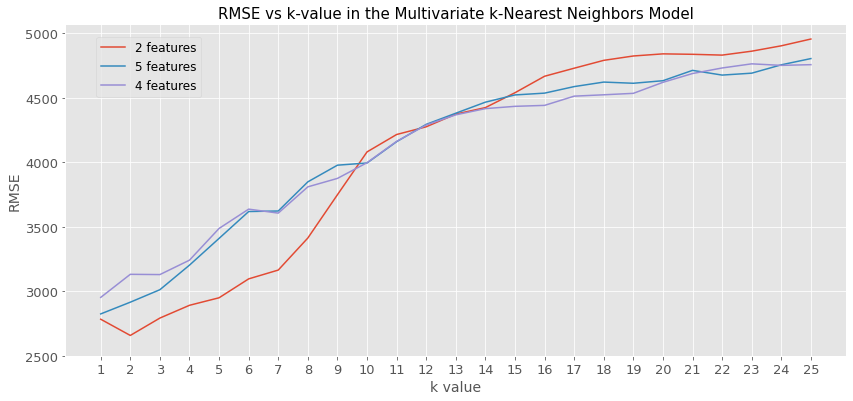

In [34]:
fig = plt.figure(figsize=(14,6.1))

keys = list(top_3_k_rmse_results.keys())

legends = []

for i in keys:
    
    plt.plot(list(top_3_k_rmse_results[i].keys()), list(top_3_k_rmse_results[i].values()))
    
    legend_string = str(i) + ' features'
    legends.append(legend_string)

plt.title('RMSE vs k-value in the Multivariate k-Nearest Neighbors Model', fontsize=15)

plt.xlabel('k value', fontsize=14)

plt.ylabel('RMSE', fontsize=14)
    
plt.legend(legends, loc=(0.04,0.78), fontsize=12)

plt.xticks(np.arange(1,26), fontsize=13)
plt.yticks(np.arange(2500,5500,500), fontsize=13, )

plt.show()

## Conclusion <a class="anchor" id="conclusion"></a>

The $2$-feature multivariate model, features = `[engine_size, horsepower]`, performed the best out of all of the models in this analysis.

The root mean squared error for the `price` predictions, given a *k* value of $2$, was approximately $2,700$.

This means that, on average, if given the engine size and the horsepower of a car , this model will predict the car's price to within an accuracy of $+/-\$2,700$.

### Further Research: <a class="anchor" id="further"></a>

* Perform a k-fold cross-validation using the dataset. Compare the results.